In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import seaborn as sns

In [3]:
nftc = pd.read_csv("C:/Users/DELL/OneDrive/CFG/hemli/nft_sales.csv")

nftc

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,Bored Ape Yacht Club,"$2,439,754,017","12,052","32,670","6,586"
2,CryptoPunks,"$2,388,467,992","6,076","22,269","3,804"
3,Mutant Ape Yacht Club,"$1,744,822,678","23,768","51,775","13,121"
4,Art Blocks,"$1,310,734,558","33,549","184,470","36,091"
...,...,...,...,...,...
245,Mindblowon,"$21,255,015","11,313","16,333","3,973"
246,Sipherian Surge,"$21,053,426","6,210","15,023","3,636"
247,Gutter Rats,"$20,915,001","2,931","5,209",NaN
248,Wool Pouch,"$20,911,179","2,249","6,139","3,270"


In [4]:
nftc.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,231
unique,250,250,250,249,227
top,Axie Infinity,"$4,090,222,023","1,790,587","10,653","4,373"
freq,1,1,1,2,2


In [5]:
nftc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       231 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


## Cleaning the data

In [6]:
nftc.rename(columns = {'Txns':'Transactions'}, inplace = True)
nftc['Sales'] = nftc['Sales'].str.replace(',', '')
nftc['Sales'] = nftc['Sales'].str.replace('$', '')
nftc['Buyers'] = nftc['Buyers'].str.replace(',','')
nftc['Transactions'] = nftc['Transactions'].str.replace(',','')
nftc['Owners'] = nftc['Owners'].str.replace(',','')
nftc=nftc.dropna()
nftc


C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\952128637.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nftc['Sales'] = nftc['Sales'].str.replace('$', '')


,Collections,Sales,Buyers,Transactions,Owners
0,Axie Infinity,4090222023,1790587,17670824,2130467
1,Bored Ape Yacht Club,2439754017,12052,32670,6586
2,CryptoPunks,2388467992,6076,22269,3804
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121
4,Art Blocks,1310734558,33549,184470,36091
...,...,...,...,...,...
244,Potatoz,21467745,6253,13581,5108
245,Mindblowon,21255015,11313,16333,3973
246,Sipherian Surge,21053426,6210,15023,3636
248,Wool Pouch,20911179,2249,6139,3270


## Converting to integar

In [17]:
nftc['Sales'] = nftc['Sales'].astype('int64')
nftc['Buyers'] = nftc['Buyers'].astype('int64')
nftc['Transactions'] = nftc['Transactions'].astype('int64')
nftc['Owners'] = nftc['Owners'].astype('int32')

C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\768966307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nftc['Sales'] = nftc['Sales'].astype('int64')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\768966307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nftc['Buyers'] = nftc['Buyers'].astype('int64')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\768966307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [8]:
nftc['100 mil club'] = np.where(nftc['Sales']>=100000000, 'Yes', 'No')

C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\963787542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nftc['100 mil club'] = np.where(nftc['Sales']>=100000000, 'Yes', 'No')


In [9]:
nftc['$/Txn'] = nftc['Sales'] * 1000000. // nftc['Transactions']

C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\2534103952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nftc['$/Txn'] = nftc['Sales'] * 1000000. // nftc['Transactions']


## Collections that made more than 100 million:

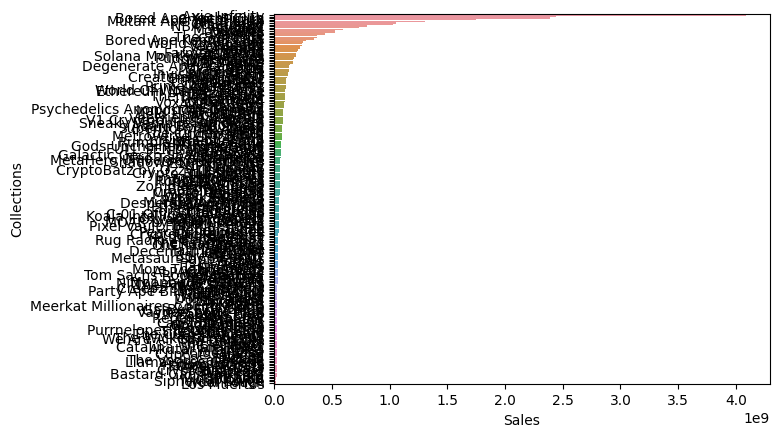

In [10]:
top_collections = nftc[ nftc['Sales'] > 100 ]
chart = sns.barplot(y="Collections", x="Sales", data=top_collections)

## Collections that have the highest average value per transaction

<AxesSubplot: xlabel='$/Txn', ylabel='Collections'>

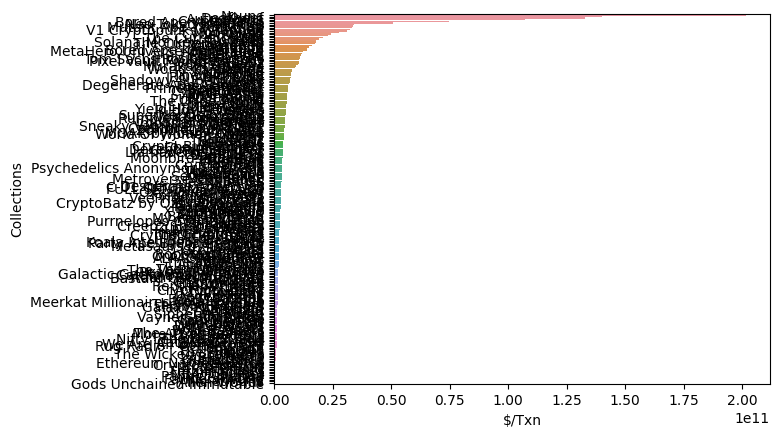

In [11]:
top_dollar = nftc[ nftc['$/Txn'] > 10000 ].sort_values(by=['$/Txn'], ascending=False)
sns.barplot(y="Collections", x="$/Txn", data=top_dollar)

## Sales from 'Axie Infinity' collection

In [14]:
axie_collection = nftc[nftc['Collections'].str.contains("Axie")]


sum_sales = axie_collection['Sales'].sum()

print(f"Total Sales of 'Axie Infinity' Collection is {sum_sales:,}$")
axie_collection

Total Sales of 'Axie Infinity' Collection is 4,090,222,023$


,Collections,Sales,Buyers,Transactions,Owners,100 mil club,$/Txn
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes,231467532.0


## Sales from the 'Bored Ape' collection

In [12]:
bored_ape_collection = nftc[nftc['Collections'].str.contains("Bored")]


sum_sales = bored_ape_collection['Sales'].sum()

print(f"Total Sales of 'Bored Ape' Collection is {sum_sales:,}$")
bored_ape_collection


Total Sales of 'Bored Ape' Collection is 2,825,485,316$


,Collections,Sales,Buyers,Transactions,Owners,100 mil club,$/Txn
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes,7.467873e+10
15,Bored Ape Kennel Club,350304508,10576,24508,5593,Yes,1.429348e+10
165,Bored Bunny,35426791,8187,12678,3679,No,2.794352e+09


## Total number of owners who have the 'Bored Ape' collection:

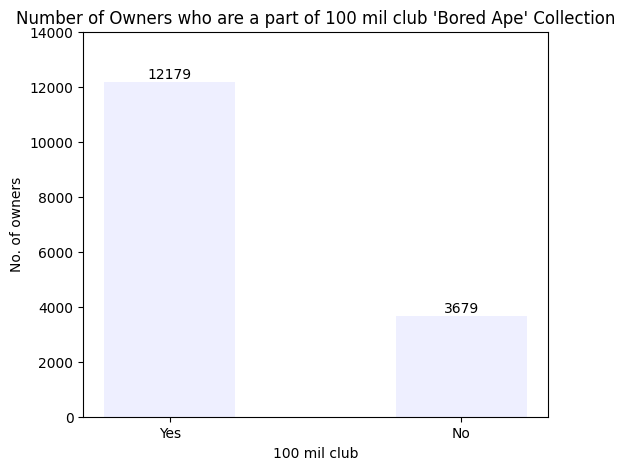

In [13]:
nftc2 = bored_ape_collection.groupby('100 mil club').sum()
owners = [nftc2['Owners'][1],nftc2['Owners'][0]]
con = ['Yes','No']
plt.style.use('default')
plt.figure(figsize=(6,5))
p =plt.bar(con,owners,width=0.45,color='#eeefff')
plt.ylim(0,14000)
plt.title("Number of Owners who are a part of 100 mil club 'Bored Ape' Collection")
plt.bar_label(p)
plt.xlabel('100 mil club')
plt.ylabel('No. of owners')
plt.show()

## Average sales of the 100 mil club:

In [42]:
nftc_100 = nftc.loc[nftc['100 mil club'] == 'Yes']
average_sales_100 =round(nftc_100['Sales'].mean())
nftc_no100 = nftc.loc[nftc['100 mil club'] == 'No']
average_sales_no100 = round(nftc_no100['Sales'].mean())
print(f'Average sales of 100 million club is {average_sales_100:,}$')


Average sales of 100 million club is 514,041,026$


C:\Users\DELL\AppData\Local\Temp\ipykernel_25752\4107462118.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


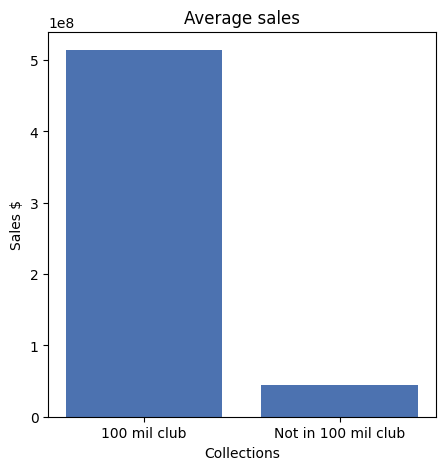

In [48]:
x= ['100 mil club','Not in 100 mil club']
avg = [average_sales_100,average_sales_no100]

plt.style.use('seaborn-deep')
plt.figure(figsize=(5,5))

plt.bar(x,avg)
plt.title('Average sales')
plt.xlabel('Collections')
plt.ylabel('Sales $')
plt.show()

## Pie chart visualization of percentage of total collections that are part of 100 mil club

C:\Users\DELL\AppData\Local\Temp\ipykernel_25752\720428347.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


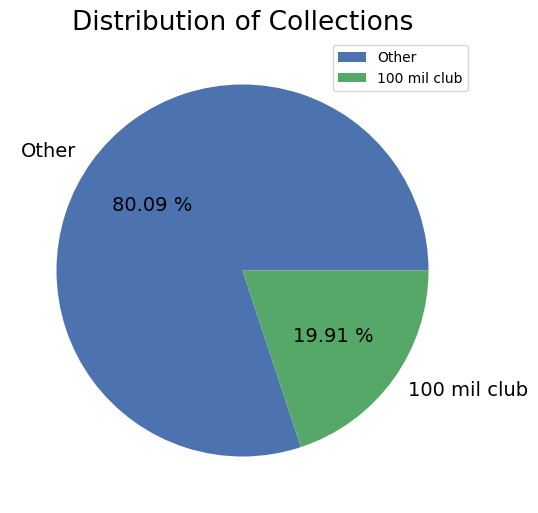

In [47]:
count = nftc.groupby(['100 mil club']).count()['Collections']
labels = ["Other","100 mil club"]
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,7))
plt.pie(count,labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})
plt.title("Distribution of Collections",fontdict={'fontsize': 19})
plt.legend(fontsize=10)
plt.show()

## Collection that makes the most sales of all time

In [53]:
maximum_sale = nftc['Sales'].max()
collection = nftc[nftc['Sales'] == maximum_sale ]['Collections'][0]

print(f'The NFT Collection having maxiumum sales is {collection}')
print(f'Total sales of {collection} are {maximum_sale:,} USD')

The NFT Collection having maxiumum sales is Axie Infinity
Total sales of Axie Infinity are 4,090,222,023 USD


## Collection with the most buyers?

In [54]:
maximum_buyers = nftc['Buyers'].max()
b_collection = nftc[nftc['Buyers'] == maximum_buyers ]['Collections'][0]

print(f'The NFT Collection having the most buyers is {b_collection}')
print(f'Total number of buyers for {b_collection} are {maximum_buyers:,}')

The NFT Collection having the most buyers is Axie Infinity
Total number of buyers for Axie Infinity are 1,790,587


# Top 10 NFTs

In [27]:
nft_10 = pd.read_csv("C:/Users/DELL/OneDrive/CFG/top10_collection.csv")
nft_10

,Unnamed: 0,name,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,...,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price
0,0,CryptoPunks,1038.850000,-0.578668,15.0,69.256667,15397.080000,-0.249986,166.0,92.753494,...,79.121361,822170.162849,1.903700e+04,9999.0,9999.0,3373,43.188011,8,9.274422e+05,NaN
1,1,Bored Ape Yacht Club,2015.722000,0.261371,17.0,118.571882,29727.211900,0.501140,247.0,120.353085,...,100.675113,382480.462666,2.451800e+04,10000.0,10000.0,6282,15.599986,51,1.203531e+06,99.690000
2,2,Decentraland,778.409245,1.569893,37.0,21.038088,2811.571225,0.083810,247.0,11.382879,...,8.112366,269395.365533,1.764800e+04,97264.0,97264.0,6624,15.264923,2,1.107144e+06,4.549106
3,3,Mutant Ape Yacht Club,1145.740000,-0.383930,47.0,24.377447,19277.636243,0.311593,736.0,26.192441,...,20.459662,233146.988436,2.533300e+04,17934.0,17934.0,11671,9.203292,16,4.697352e+05,22.000000
4,4,Art Blocks Curated,491.342152,0.727071,150.0,3.275614,4112.559325,1.330952,1519.0,2.707412,...,2.764180,226661.230085,5.100400e+04,50324.0,50324.0,10534,4.443989,0,1.362478e+05,NaN
5,5,The Sandbox,581.457447,-0.238971,124.0,4.689173,4639.330422,-0.089718,1045.0,4.439551,...,4.141228,151141.220368,7.887000e+04,127792.0,127792.0,19142,1.916333,8,5.673391e+05,3.740000
6,6,CLONE X - X TAKASHI MURAKAMI,2469.360800,-0.277498,124.0,19.914200,31811.078866,1.355066,1620.0,19.636468,...,13.718301,111097.778793,1.150300e+04,18803.0,18803.0,8167,9.658157,15,3.692245e+05,14.450000
7,7,Rarible,3.699000,-0.483668,1018.0,0.003634,181.882444,0.684623,5264.0,0.034552,...,0.050883,99406.201575,2.067163e+09,310573.0,310573.0,205087,0.000048,14,1.073096e+04,NaN
8,8,Azuki,2698.166485,0.396775,231.0,11.680374,30605.221296,-0.047167,2174.0,14.077839,...,5.623368,94084.570329,1.673100e+04,10000.0,10000.0,5449,5.623368,20,1.407784e+05,9.480000
9,9,Decentraland Wearables,0.688973,-0.746744,6.0,0.114829,4.887595,0.170027,36.0,0.135767,...,0.133221,85701.290681,2.302100e+04,71061.0,71061.0,10285,3.722744,1,9.647706e+03,0.001897


## Removing columns

In [28]:
nft_10.drop(nft_10[['one_day_volume','one_day_change','one_day_average_price','seven_day_volume','seven_day_change','seven_day_average_price','thirty_day_average_price','total_volume','total_supply','count','num_reports']], axis = 1, inplace = True)


In [31]:
nft_10.drop(nft_10[['thirty_day_volume','thirty_day_change']], axis = 1, inplace = True)


In [33]:
nft_10.drop(nft_10[['seven_day_sales','market_cap','floor_price']], axis = 1, inplace = True)


In [37]:
nft_10.rename(columns = {'total_sales':'Transactions'}, inplace = True)
nft_10.rename(columns = {'num_owners':'Owners'}, inplace = True)
nft_10.head()

,Unnamed: 0,name,one_day_sales,thirty_day_sales,Transactions,Owners,average_price
0,0,CryptoPunks,15.0,598.0,19037.0,3373,43.188011
1,1,Bored Ape Yacht Club,17.0,818.0,24518.0,6282,15.599986
2,2,Decentraland,37.0,1295.0,17648.0,6624,15.264923
3,3,Mutant Ape Yacht Club,47.0,2787.0,25333.0,11671,9.203292
4,4,Art Blocks Curated,150.0,3856.0,51004.0,10534,4.443989


## converting to integar

In [40]:
nft_10['one_day_sales'] = nft_10['one_day_sales'].astype('int64')
nft_10['thirty_day_sales'] = nft_10['thirty_day_sales'].astype('int64')
nft_10['Transactions'] = nft_10['Transactions'].astype('int64')
nft_10['Owners'] = nft_10['Owners'].astype('int32')
nft_10['average_price'] = nft_10['average_price'].astype('int64')

In [41]:
nft_10.head(11)

,Unnamed: 0,name,one_day_sales,thirty_day_sales,Transactions,Owners,average_price
0,0,CryptoPunks,15,598,19037,3373,43
1,1,Bored Ape Yacht Club,17,818,24518,6282,15
2,2,Decentraland,37,1295,17648,6624,15
3,3,Mutant Ape Yacht Club,47,2787,25333,11671,9
4,4,Art Blocks Curated,150,3856,51004,10534,4
5,5,The Sandbox,124,5749,78870,19142,1
6,6,CLONE X - X TAKASHI MURAKAMI,124,4132,11503,8167,9
7,7,Rarible,1018,11451,2067162578,205087,0
8,8,Azuki,231,16731,16731,5449,5
9,9,Decentraland Wearables,6,172,23021,10285,3


## Dataset about the history of sales

In [52]:
nfth = pd.read_csv("C:/Users/DELL/OneDrive/CFG/NFT_Sales_history.csv")

nfth

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.000000e+00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1.020300e+03,19,8.0,0,19.0,53.70,1.020300e+03,19.0,8.0,0.0
2,2017-06-24,2.261140e+03,40,21.0,0,21.0,56.53,1.240840e+03,21.0,13.0,0.0
3,2017-06-25,2.778690e+03,53,28.0,0,13.0,52.43,5.175500e+02,13.0,7.0,0.0
4,2017-06-26,3.203320e+03,67,34.0,0,14.0,47.81,4.246300e+02,14.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1601,2021-11-08,1.008803e+10,10913146,NaN,6541355,14829.0,924.39,7.706698e+07,59264.0,NaN,44435.0
1602,2021-11-09,1.014001e+10,10964025,NaN,6573511,18723.0,924.84,5.197508e+07,50879.0,NaN,32156.0
1603,2021-11-10,1.019902e+10,11008847,NaN,6601205,17128.0,926.44,5.901034e+07,44822.0,NaN,27694.0
1604,2021-11-11,1.023456e+10,11022782,NaN,6609013,6127.0,928.49,3.554317e+07,13935.0,NaN,7808.0


## Removing null values

In [53]:
nfth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1606 non-null   object 
 1   Sales_USD_cumsum              1606 non-null   float64
 2   Number_of_Sales_cumsum        1606 non-null   int64  
 3   Active_Market_Wallets_cumsum  1598 non-null   float64
 4   Primary_Sales_cumsum          1606 non-null   int64  
 5   Secondary_Sales_cumsum        1605 non-null   float64
 6   AverageUSD_cum                1605 non-null   float64
 7   Sales_USD                     1605 non-null   float64
 8   Number_of_Sales               1605 non-null   float64
 9   Active_Market_Wallets         1597 non-null   float64
 10  Primary_Sales                 1605 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 138.1+ KB


In [54]:
nfth.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [55]:
nfth['Active_Market_Wallets_cumsum'] = nfth['Active_Market_Wallets_cumsum'].fillna(nfth['Active_Market_Wallets_cumsum'].mean())
nfth['Active_Market_Wallets'] = nfth['Active_Market_Wallets'].fillna(nfth['Active_Market_Wallets'].mean())
nfth = nfth.fillna(0)

In [56]:
nfth.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
dtype: int64

In [57]:
nfth.describe()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
count,1.606000e+03,1.606000e+03,1606.000000,1.606000e+03,1606.000000,1606.000000,1.606000e+03,1606.000000,1606.000000,1606.000000
mean,5.914905e+08,3.397818e+06,155847.829161,2.218615e+06,2747.661893,98.180037,6.368845e+06,6862.133873,502.875391,4114.471980
std,1.720005e+09,2.329504e+06,135743.538676,1.432603e+06,5596.177405,179.841440,2.485379e+07,12607.583410,1359.979840,7577.222269
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1024.000000,0.000000,-6.196720e+06,-2195.000000,-573.000000,-1171.000000
25%,5.129669e+07,1.451181e+06,82184.250000,9.735630e+05,661.250000,27.110000,4.603505e+04,2272.500000,69.000000,1461.250000
50%,8.691480e+07,3.203392e+06,122205.500000,2.296888e+06,1024.500000,32.040000,8.202768e+04,3678.000000,127.500000,2356.500000
75%,1.328586e+08,4.938128e+06,180295.000000,3.150981e+06,1845.250000,70.947500,3.525654e+05,5840.750000,274.750000,3694.500000
max,1.023456e+10,1.102278e+07,803665.000000,6.609013e+06,69685.000000,928.490000,3.886364e+08,161732.000000,30129.000000,93609.000000


In [58]:
nfth.drop(nfth[['AverageUSD_cum','Number_of_Sales_cumsum']], axis = 1, inplace = True)

## Average sales overtime

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


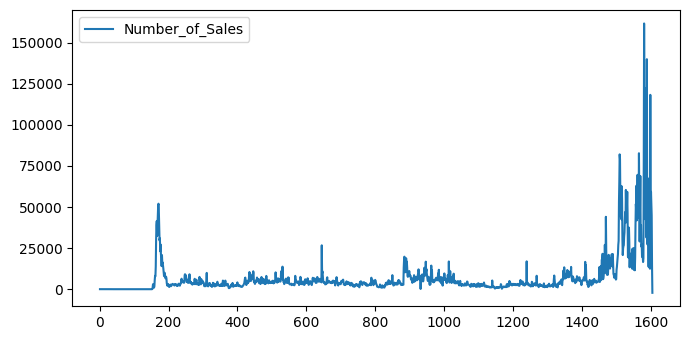

In [60]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

columns = ['Number_of_Sales', 'Date']

nfth = pd.read_csv("C:/Users/DELL/OneDrive/CFG/NFT_Sales_history.csv", usecols=columns)

nfth.plot()

plt.show()